In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib as mpl # useful for many scientific computing in Python
import matplotlib.pyplot as plt # primary data structure library
from PIL import Image # converting images to array

In [3]:
!pip3 install wordcloud

from wordcloud import WordCloud, STOPWORDS

Word clouds are commonly used to perform high-level analysis and visualization of text data. Accordinly, let's digress from the immigration dataset and work with an example that involves analyzing text data. Let's try to analyze a short novel written by Lewis Carroll titled Alice's Adventures in Wonderland. Let's go ahead and download a .txt file of the novel.

In [5]:
import urllib

alice_novel = urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt').read().decode("utf-8")

Next, let's use the stopwords that we imported from word_cloud. We use the function set to remove any redundant stopwords

In [6]:
stopwords= set(STOPWORDS)

Create a word cloud object and generate a word cloud. For simplicity, let's generate a word cloud using only the first 2000 words in the novel.

In [7]:
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
alice_wc.generate(alice_novel)


Awesome! Now that the word cloud is created, let's visualize it.

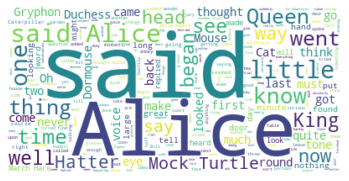

In [8]:
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

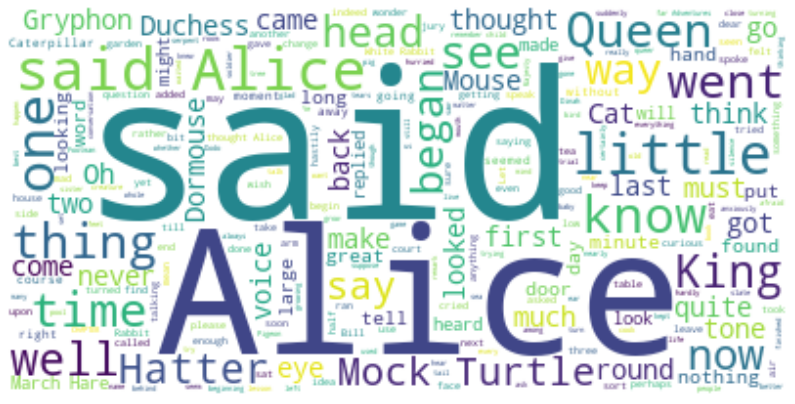

In [9]:
fig=plt.figure(figsize=(14,18))
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()



Much better! However, said isn't really an informative word. So let's add it to our stopwords and re-generate the cloud.

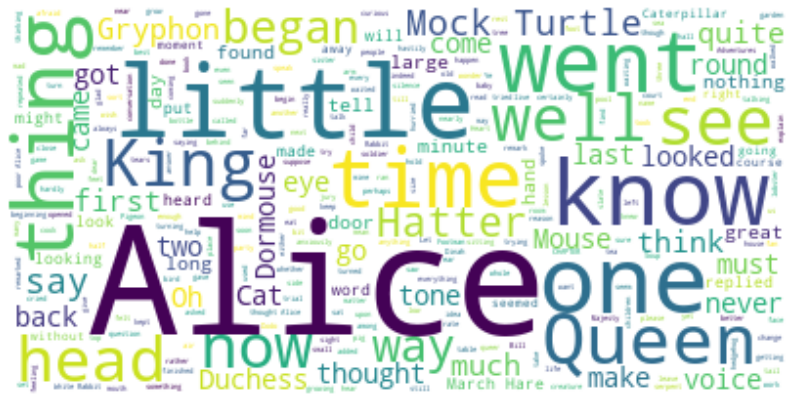

In [10]:
stopwords.add('said') #add the words said to stopwords
# regenarate the word cloud 
alice_wc.generate(alice_novel)

fig=plt.figure(figsize=(14,18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Excellent! This looks really interesting! Another cool thing you can implement with the word_cloud package is superimposing the words onto a mask of any shape. Let's use a mask of Alice and her rabbit. We already created the mask for you, so let's go ahead and download it and call it alice_mask.png.

In [11]:
# save mask to alice_mask
alice_mask = np.array(Image.open(urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png')))

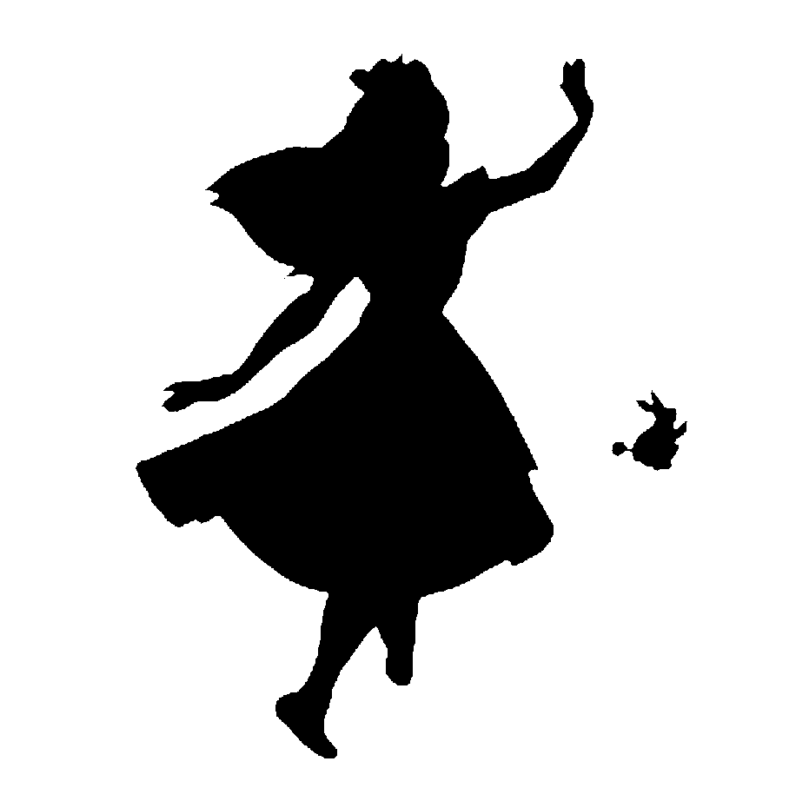

In [12]:
fig=plt.figure(figsize=(14,18))

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()


Shaping the word cloud according to the mask is straightforward using word_cloud package. For simplicity, we will continue using the first 2000 words in the novel.

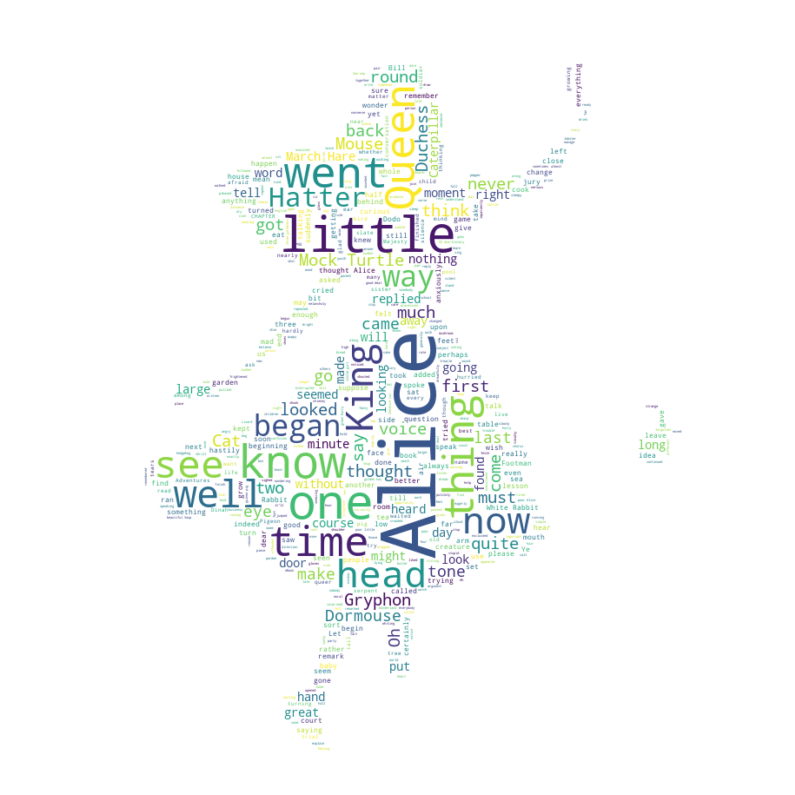

In [13]:
# instantiate a word cloud object
alice_wc=WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords= stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

#display the word cloud 

fig=plt.figure(figsize=(14,18))
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()